问题

$$ \min  2x+3y$$
$$s.t.$$
$$2x+y<=10  $$
$$3x+6y<=40$$
$$ x,y \in Z$$

检验gurobi在Branch&Bound过程中的node上加cut对于其他分支的影响

结论

cbCut仅对当前分支以下的点有影响。

cbLazy对所有整数解有影响，换句话说，任何整数解都要满足Lazycut。对于松弛解，Lazy将不满足的松弛解，变成Lazy约束取等polyhedra上的点。

In [1]:
import gurobipy as gp
from gurobipy import GRB


n=gp.Model()

x1 = n.addVar(lb=0, vtype=GRB.INTEGER, name="x1") #定义决策变量
x2 = n.addVar(lb=0, vtype=GRB.INTEGER , name ="x2")
n.setObjective(2*x1+3*x2, GRB.MAXIMIZE) 
n.addConstr(2*x1+x2<=10)
n.addConstr(3*x1+6*x2<=40)
n.Params.Precrush=1
n.Params.lazyConstraints = 1
n.Params.Heuristics=0
n.Params.Cuts=0
n.update()

def mycallback(model,where):
    if where == GRB.Callback.MIPSOL: #整数节点
        sol = model.cbGetSolution(model._vars)
        print('int',sol)

    elif where == GRB.Callback.MIPNODE: #松弛节点
        if model.cbGet(GRB.Callback.MIPNODE_STATUS) == GRB.OPTIMAL:
            sol = model.cbGetNodeRel(model._vars)
            print(sol)
#             if sol[1]==5.333333333333333:  #在初始松弛节点加cut
#                 model.cbCut(2*model._vars[0] + model._vars[1] <= 9)
#                 print('Cut_by_Hand')  
            
#             if sol[1]==5.5: #在第二个松弛节点加cut
#                 model.cbCut(2*model._vars[0] + model._vars[1] <= 9)
#                 model.cbLazy(2*model._vars[0] + model._vars[1] <= 9)
#                 print('Cut_by_Hand')
n._vars = n.getVars()
n.optimize(mycallback)

Using license file c:\gurobi911\gurobi.lic
Changed value of parameter Precrush to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter Heuristics to 0.0
   Prev: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
Changed value of parameter Cuts to 0
   Prev: -1  Min: -1  Max: 3  Default: -1
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xd33f73af
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+01]
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: objective 2.066667e+01, 2 iterations, 0.00 seconds

    N

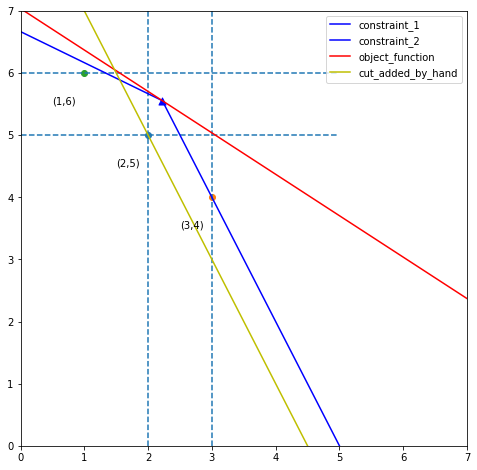

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))
x = np.linspace(0,10,50)
x1= np.linspace(20/9,5,50)
x2= np.linspace(0,20/9,50)

y1 = 10-2*x1
y2= (40-3*x2)/6
obj=(190/9-2*x)/3
c=-2*x+9
plt.xlim((0,7))
plt.ylim((0,7))

plt.scatter(2,5)
plt.text(2-0.5,5-0.5,'(2,5)')
plt.scatter(3,4)
plt.text(3-0.5,4-0.5,'(3,4)')
plt.scatter(1,6)
plt.text(1-0.5,6-0.5,'(1,6)')

plt.scatter(20/9,50/9,s=50,marker='^',c='b')

plt.hlines(6,0,5,linestyles='--')
plt.hlines(5,0,5,linestyles='--')

plt.vlines(2,0,8,linestyles='--')
plt.vlines(3,0,8,linestyles='--')

plt.plot(x1,y1,color='b')
plt.plot(x2,y2,color='b')
plt.plot(x,obj,color='r')
plt.plot(x,c,color='y')
plt.legend(['constraint_1','constraint_2','object_function','cut_added_by_hand'])
plt.show()